## Apple Stock Market Predictions using LSTM

### This code obtains historical stock price data for Apple, preprocesses the data, builds and trains an LSTM model, and then uses the model to predict future stock prices.  It also includes visualization of the data and the model's predictions.

In [1]:
# Importing necessary libraries
import matplotlib.pyplot as plt  # For plotting
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation
import yfinance as yf  # For fetching stock data
from sklearn.preprocessing import MinMaxScaler  # For data scaling
from sklearn.model_selection import train_test_split  # For splitting data
import tensorflow as tf  # For building the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_absolute_error  # For model evaluation

np.random.seed(123)

In [2]:
# Fetch historical data for Apple stock
#df = yf.download('AAPL', period="max")[['Close']].reset_index()

df = yf.download('AAPL',start="2015-01-01",end="2024-05-09")



[*********************100%%**********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.402168,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.714724,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.716961,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.049517,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,24.973557,237458000


In [4]:
# Display the columns of the DataFrame
print(df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


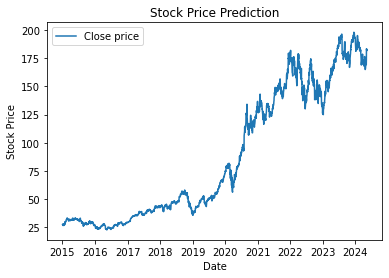

In [5]:
# Plotting the closing price of the stock over time

plt.plot(df.index, df['Close'], label='Close price')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [6]:
# Displaying the shape of the DataFrame
df.shape

(2353, 6)

In [7]:
# Checking for duplicates in the DataFrame
df.duplicated().sum()

0

In [8]:
# Checking for any null values in the DataFrame
df.isnull().values.any()

False

In [9]:
# Displaying information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2353 entries, 2015-01-02 to 2024-05-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2353 non-null   float64
 1   High       2353 non-null   float64
 2   Low        2353 non-null   float64
 3   Close      2353 non-null   float64
 4   Adj Close  2353 non-null   float64
 5   Volume     2353 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 128.7 KB


In [10]:
# Splitting the data into train and test sets
df_train = df[:1883]
df_test = df[1883:]


In [11]:
# Saving the train and test data to CSV files
df_train.to_csv('data_train.csv')
df_test.to_csv('data_test.csv')

In [12]:
# Selecting the 'Close' column for training
df_data= df.iloc[: , 3:4]
df_data.head()

,Close
Date,
2015-01-02,27.332500
2015-01-05,26.562500
2015-01-06,26.565001
2015-01-07,26.937500
2015-01-08,27.972500


In [13]:
# Creating numpy arrays for training and testing

trainig_set= df_data.iloc[:1883,:].values
test_set= df_data.iloc[1883:,:].values

In [14]:
# Feature scaling using MinMaxScaler

sc= MinMaxScaler(feature_range=(0,1))
trainig_set_scaled= sc.fit_transform(trainig_set)


In [15]:
# Creating a data structure with 60 timesteps and 1 output
X_train=[] 
y_train= [] 

for i in range(60,1883):
    X_train.append(trainig_set_scaled[i-60:i,0]) 
    y_train.append(trainig_set_scaled[i,0])
    
X_train, y_train= np.array(X_train), np.array(y_train)

In [16]:

X_train.shape, y_train.shape

((1823, 60), (1823,))

In [17]:
# Reshaping the training data
X_train= np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1823, 60, 1)

In [18]:
#  Building the model

# Initializing the LSTM model
model= Sequential()

# Adding LSTM layers with dropout regularization
model.add(LSTM(units=128,return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(rate=0.25))

model.add(LSTM(units=128,return_sequences=True))
model.add(Dropout(rate=0.25))

model.add(LSTM(units=128,return_sequences=True))
model.add(Dropout(rate=0.25))

model.add(LSTM(units=128,return_sequences=True))
model.add(Dropout(rate=0.25))

model.add(LSTM(units=128))
model.add(Dropout(rate=0.25))

# Adding the output layer
model.add(Dense(units=1))

# Compiling the Model
model.compile(loss='mean_squared_error', optimizer='adam')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 128)           66560     
                                                                 
 dropout (Dropout)           (None, 60, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 128)           131584    
                                                                 
 dropout_1 (Dropout)         (None, 60, 128)           0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 128)           131584    
                                                                 
 dropout_2 (Dropout)         (None, 60, 128)           0         
                                                                 
 lstm_3 (LSTM)               (None, 60, 128)           1

In [20]:
# Fitting the model 
history=model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
57/57 [==============================] - 15s 146ms/step - loss: 0.0154
Epoch 2/100
57/57 [==============================] - 9s 159ms/step - loss: 0.0026
Epoch 3/100
57/57 [==============================] - 9s 157ms/step - loss: 0.0033
Epoch 4/100
57/57 [==============================] - 9s 160ms/step - loss: 0.0023
Epoch 5/100
57/57 [==============================] - 9s 163ms/step - loss: 0.0024
Epoch 6/100
57/57 [==============================] - 9s 160ms/step - loss: 0.0023
Epoch 7/100
57/57 [==============================] - 9s 161ms/step - loss: 0.0019
Epoch 8/100
57/57 [==============================] - 9s 160ms/step - loss: 0.0024
Epoch 9/100
57/57 [==============================] - 10s 168ms/step - loss: 0.0024
Epoch 10/100
57/57 [==============================] - 9s 161ms/step - loss: 0.0019
Epoch 11/100
57/57 [==============================] - 9s 162ms/step - loss: 0.0023
Epoch 12/100
57/57 [==============================] - 9s 161ms/step - loss: 0.0019
Epoch 13/10

57/57 [==============================] - 9s 160ms/step - loss: 7.7072e-04
Epoch 99/100
57/57 [==============================] - 9s 161ms/step - loss: 7.4218e-04
Epoch 100/100
57/57 [==============================] - 9s 160ms/step - loss: 7.8063e-04


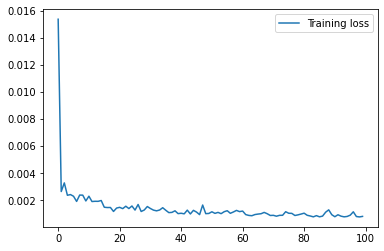

In [21]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.legend()
plt.show()

In [22]:
# Reading the data sets
train_data= pd.read_csv('data_train.csv')
test_data= pd.read_csv('data_test.csv')

In [23]:
# Extracting the real stock prices from the test data
actual_stock_price = test_data.iloc[:, 3:4].values

In [24]:
actual_stock_price.shape

(470, 1)

In [25]:
test_set.shape

(470, 1)

In [26]:
# Concatenate the dataset and scaling
data_total= pd.concat([train_data['Close'], test_data['Close']],  axis=0)
inputs= data_total[len(data_total)-len(test_data)-60:].values 
inputs = inputs.reshape(-1,1) 
inputs = sc.transform(inputs)

# Creating the input data for the test set
X_test = []
for i in range(60, 530):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
# 3D format
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [27]:
inputs.shape

(530, 1)

In [28]:
data_total.shape

(2353,)

In [29]:
X_test.shape

(470, 60, 1)

In [30]:
# Predicting the stock prices for the test set
predicted_stock_price = model.predict(X_test)

15/15 [==============================] - 2s 52ms/step


In [31]:
# # Inverse scaling to get actual stock prices
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

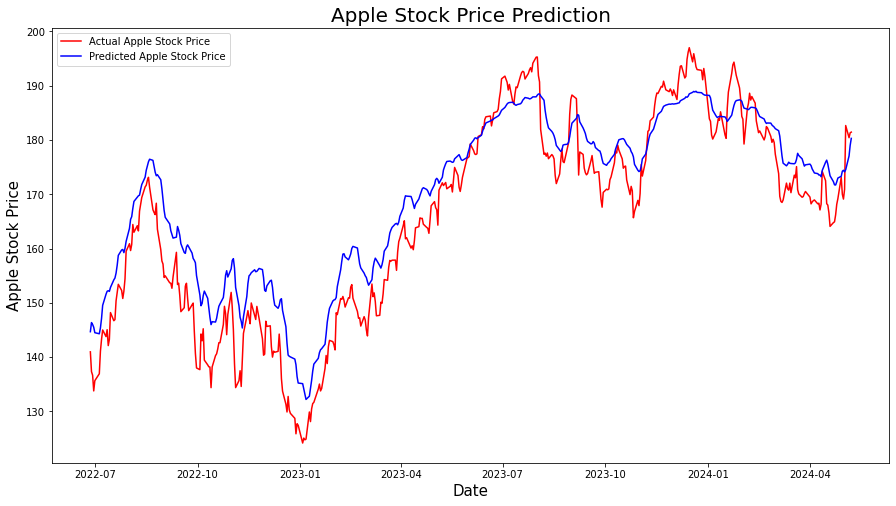

In [32]:
# Plotting the results
# Plotting the actual and predicted stock prices

# Convert the index of the test_data DataFrame to datetime format
test_data.index = pd.to_datetime(test_data['Date'])

# Plotting the results with dates on the x-axis
plt.figure(figsize=(15,8))
plt.plot(test_data.index, actual_stock_price, color='Red', label='Actual Apple Stock Price')
plt.plot(test_data.index, predicted_stock_price, color='Blue', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Apple Stock Price', fontsize=15)
plt.legend()
plt.show()

In [33]:
# Save the model
model.save('model-LSTM.h5')